# Bike Sharing Assignment

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 
from sklearn.linear_model import LinearRegression 
from sklearn.feature_selection import RFE 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

## Load the DataSet

In [2]:
df = pd.read_csv('day.csv')

In [3]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Check for NULL values, Missing Data and Data Types

In [4]:
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
print(df.shape)

(730, 16)


In [7]:
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [9]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Data CleanUp

In [10]:
# Remove unnecessary data from the Data set
df.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [11]:
df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


## Map the values from Data Dictionary for categorical variables

In [12]:
df.season = df.season.map({1:'Spring',2:'Summer',3:'fall',4:'winter'})
df.mnth = df.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
df.weekday = df.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})
df.weathersit = df.weathersit.map({1:'Clear/PartlyCloudy',2:'Cloudy/Mist',3:'LightSnowRain',4:'HeavySnowRain'})

In [13]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Sat,0,Cloudy/Mist,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sun,0,Cloudy/Mist,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Mon,1,Clear/PartlyCloudy,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tue,1,Clear/PartlyCloudy,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wed,1,Clear/PartlyCloudy,9.305237,11.46350,43.6957,12.522300,1600


## Exploratory data analysis

<Figure size 1800x1200 with 0 Axes>

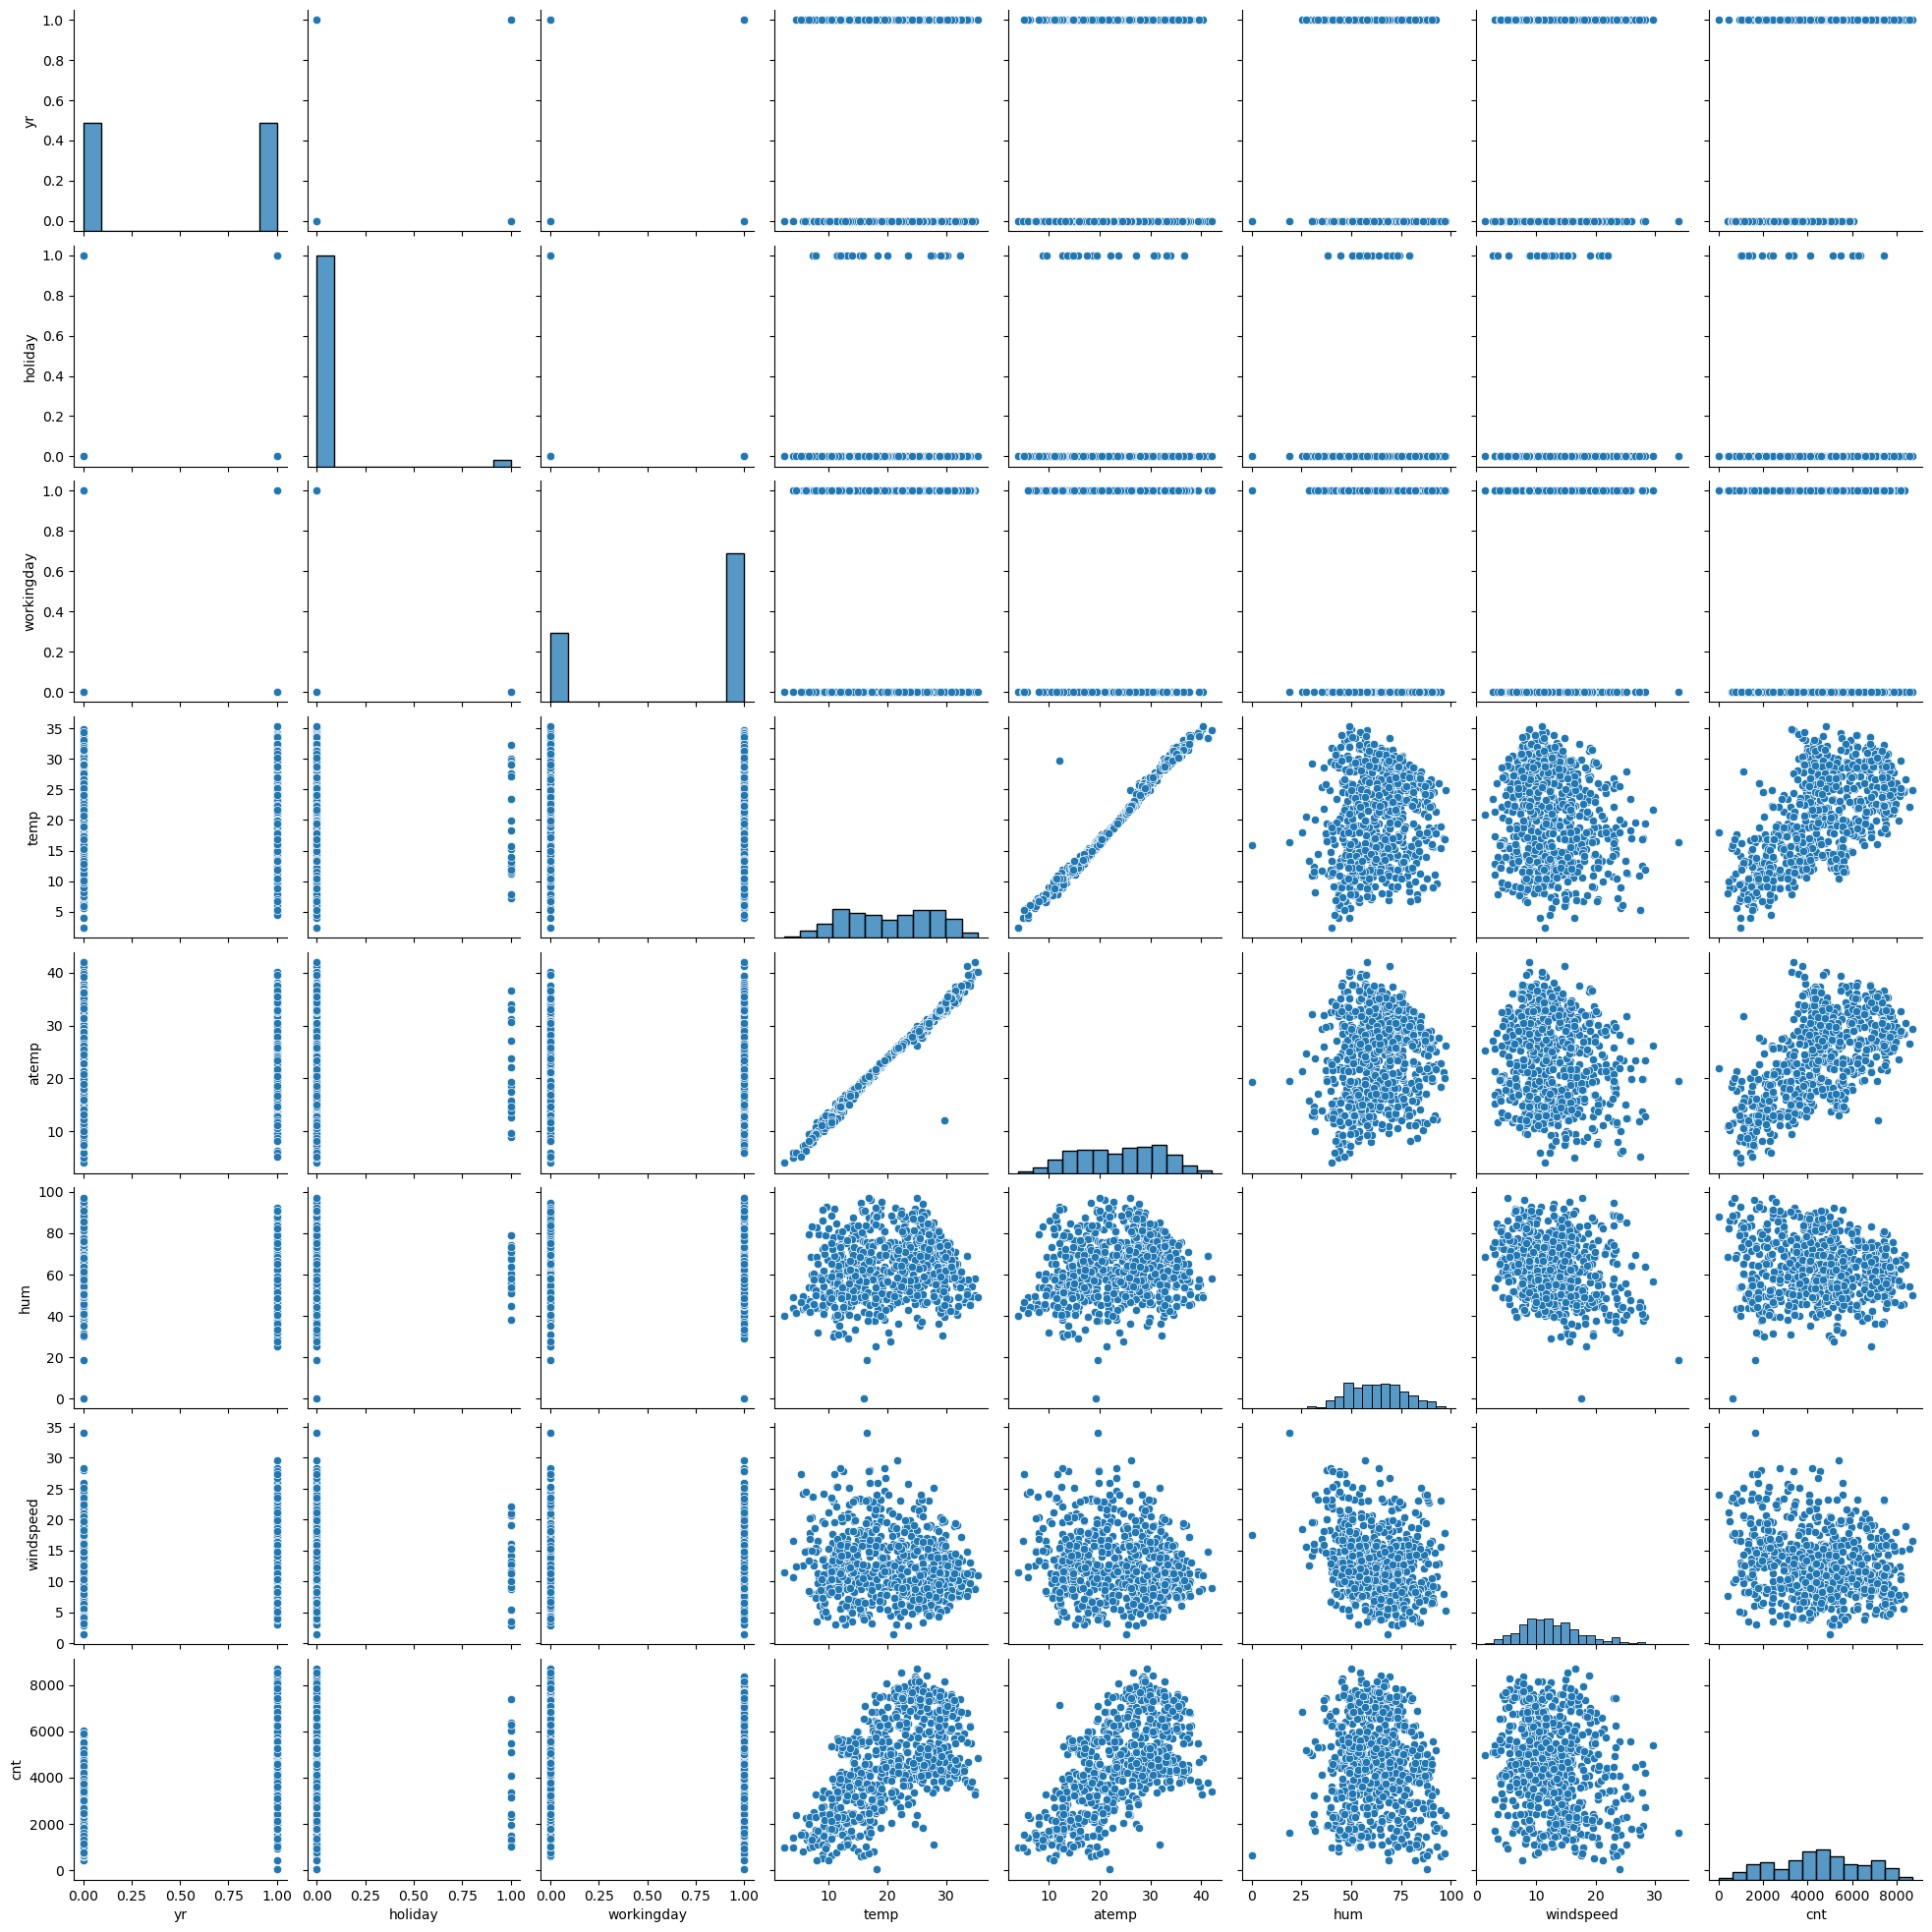

In [16]:
# Exploring Relationships Between Variables
plt.figure(figsize=(18,12))
sns.pairplot(df)
plt.show()

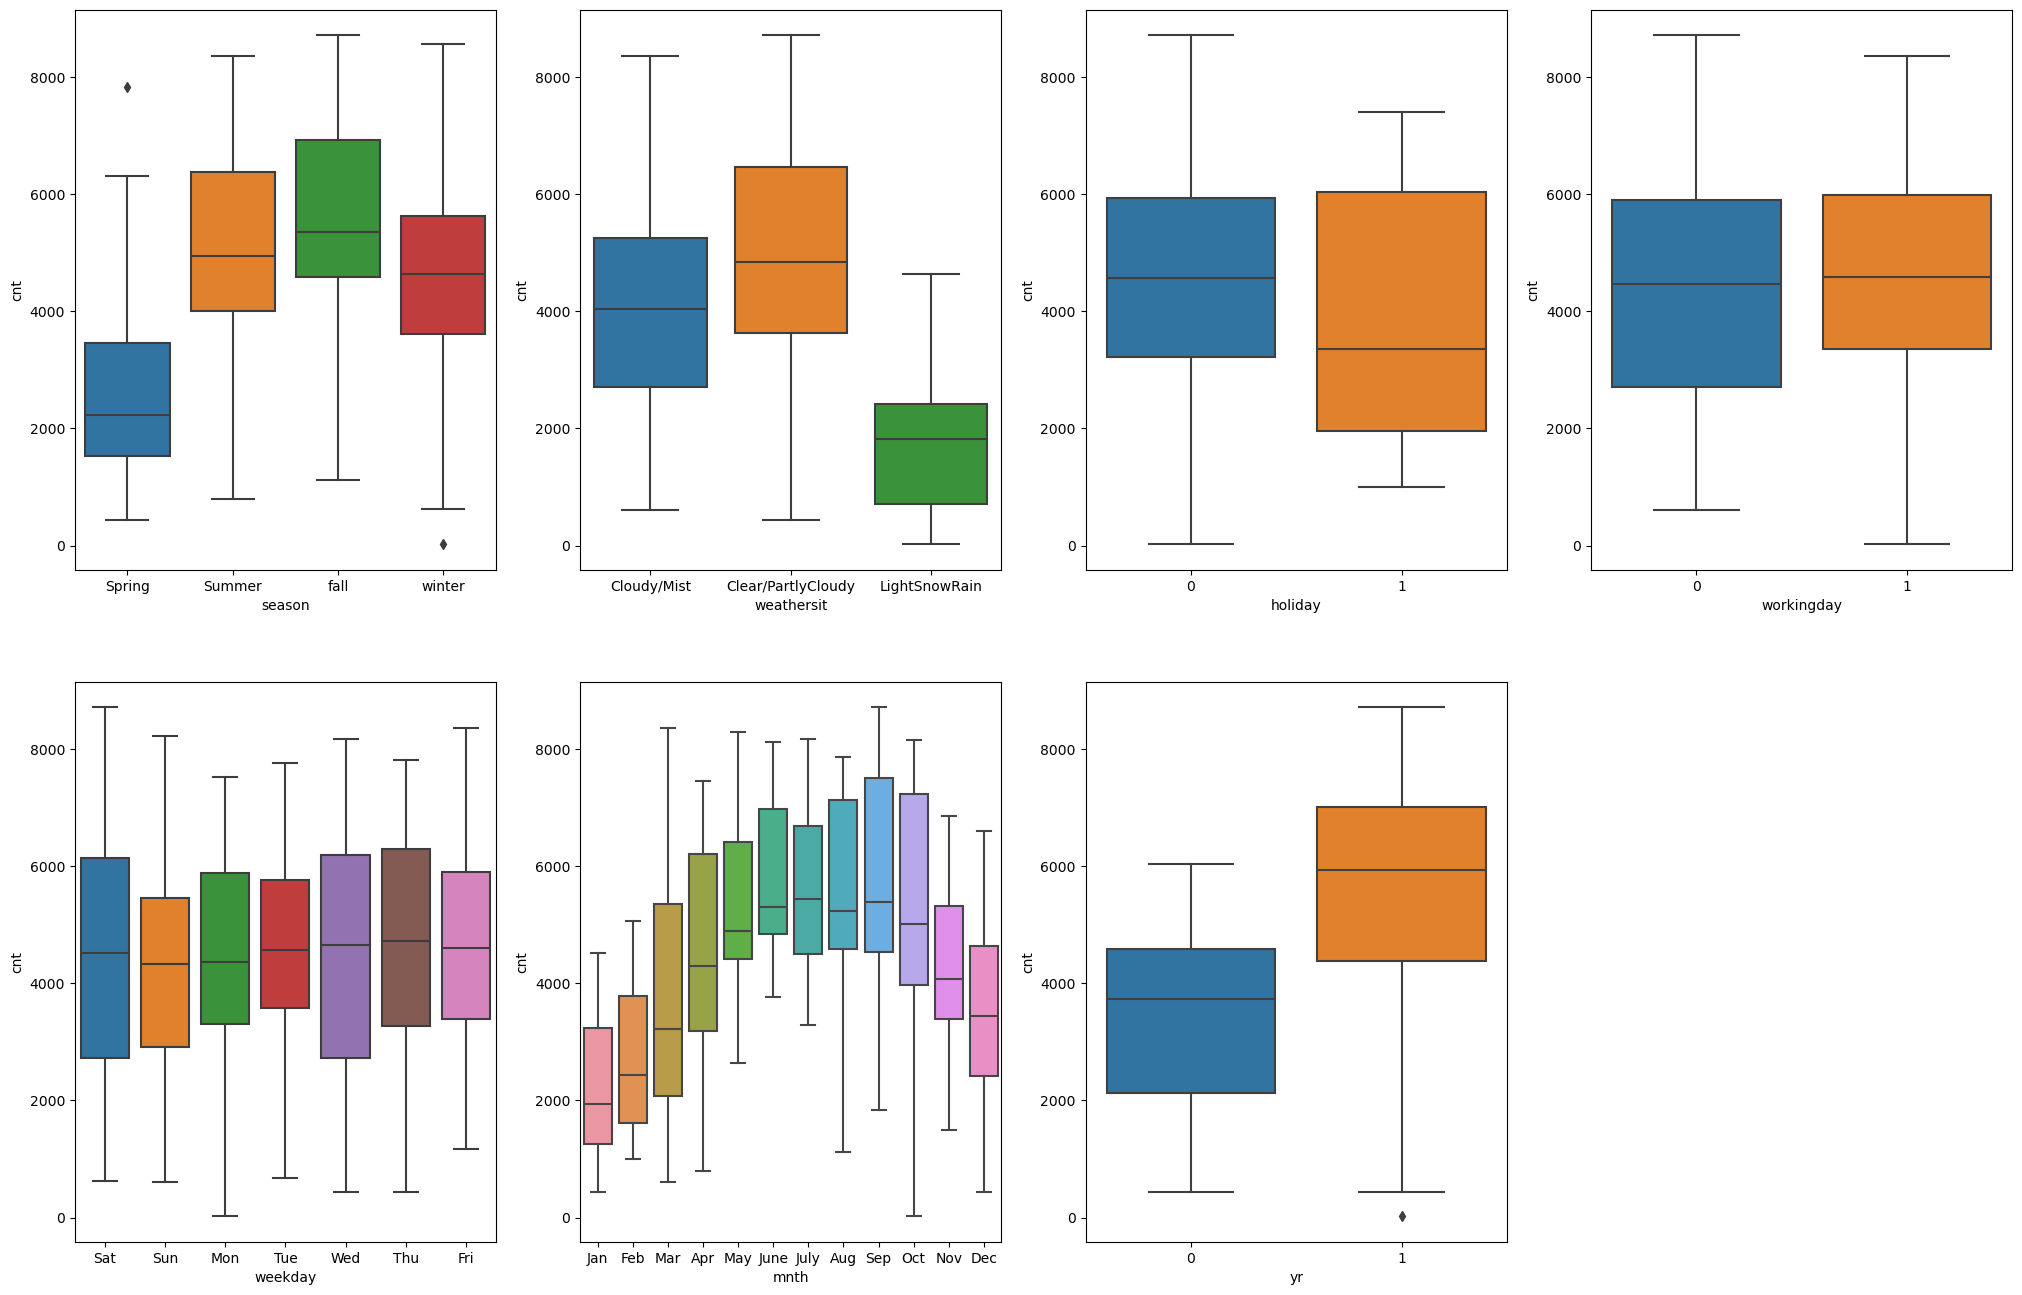

In [20]:
# Distribution of target variable (cnt) across different categories of predictor variables
plt.figure(figsize=(25, 16))
plt.subplot(2,4,1)
sns.boxplot(x= 'season', y= 'cnt', data= df)
plt.subplot(2,4,2)
sns.boxplot(x= 'weathersit', y= 'cnt', data = df)
plt.subplot(2,4,3)
sns.boxplot(x= 'holiday', y= 'cnt', data= df)
plt.subplot(2,4,4)
sns.boxplot(x= 'workingday', y= 'cnt', data= df)
plt.subplot(2,4,5)
sns.boxplot(x= 'weekday', y= 'cnt', data= df)
plt.subplot(2,4,6)
sns.boxplot(x= 'mnth', y= 'cnt', data= df)
plt.subplot(2,4,7)
sns.boxplot(x= 'yr', y= 'cnt', data= df)
plt.show()

## EDA Interpretation
- The boxplots shows that Spring has the lowest median number of bike rentals compared to other seasons.
- Clear weather has the highest number of bike rentals, followed by partly cloudy.
- There appears to be a slightly higher median for bike rentals on weekdays compared to weekends.
- The boxplots shows a potential upward trend in bike rentals from April to September.
- The boxplot of year confirms an increase in median bike rentals from 2018 to 2019.

In [21]:
df.dropna()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Sat,0,Cloudy/Mist,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sun,0,Cloudy/Mist,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Mon,1,Clear/PartlyCloudy,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tue,1,Clear/PartlyCloudy,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wed,1,Clear/PartlyCloudy,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,Spring,1,Dec,0,Thu,1,Cloudy/Mist,10.420847,11.33210,65.2917,23.458911,2114
726,Spring,1,Dec,0,Fri,1,Cloudy/Mist,10.386653,12.75230,59.0000,10.416557,3095
727,Spring,1,Dec,0,Sat,0,Cloudy/Mist,10.386653,12.12000,75.2917,8.333661,1341
728,Spring,1,Dec,0,Sun,0,Clear/PartlyCloudy,10.489153,11.58500,48.3333,23.500518,1796


In [22]:
# Correlation Heatmap 
plt.figure(figsize=(8,8))

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

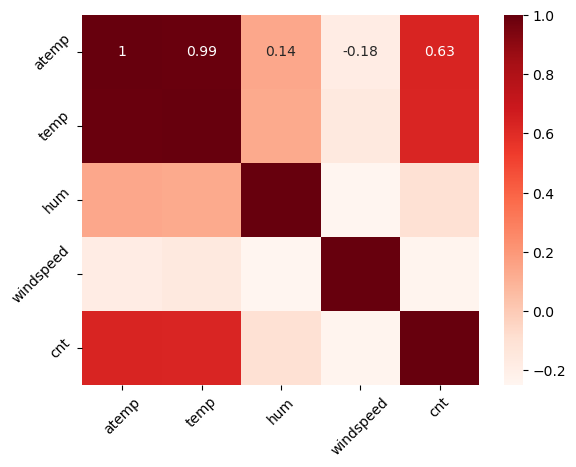

In [25]:
sns.heatmap(df[['atemp','temp','hum','windspeed','cnt']].corr(),annot=True, cmap="Reds")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

## Data Preparation
- To prepare the data for modeling, we need to convert categorical variables into a format that can be understood by the algorithm. This process is known dummy variable creation.

In [26]:
# Based on EDA, it was determined that the workingday and weekday variables did not have a significant impact on bike demand. To reduce the dimensionality of the data and improve model performance, these columns were dropped.
df.drop(['workingday','weekday'],axis=1,inplace=True)

In [27]:
# Create dummy variables for categorical columns
df = pd.get_dummies(df, columns=['season', 'mnth', 'weathersit'], drop_first=True, dtype=int)
df.head()

,yr,holiday,temp,atemp,hum,windspeed,cnt,season_Summer,season_fall,season_winter,...,mnth_Jan,mnth_July,mnth_June,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weathersit_Cloudy/Mist,weathersit_LightSnowRain
0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,0,0,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,...,1,0,0,0,0,0,0,0,0,0


## Data Splitting into triaing and test sets

In [28]:
# Data Splitting
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size=0.7, random_state=100)

In [29]:
print(df_train.shape)
print(df_test.shape)

(510, 23)
(220, 23)


In [30]:
# Feature Scaling
scaler = MinMaxScaler()
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,temp,atemp,hum,windspeed,cnt,season_Summer,season_fall,season_winter,...,mnth_Jan,mnth_July,mnth_June,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weathersit_Cloudy/Mist,weathersit_LightSnowRain
576,1,0,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,0,...,0,1,0,0,0,0,0,0,0,0
426,1,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,0,...,0,0,0,1,0,0,0,0,1,0
728,1,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,0,...,0,0,0,0,0,0,0,0,0,0
482,1,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,0,...,0,0,0,0,0,0,0,0,1,0
111,0,0,0.345824,0.318819,0.751824,0.380981,0.191095,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [31]:
df_train.describe()

,yr,holiday,temp,atemp,hum,windspeed,cnt,season_Summer,season_fall,season_winter,...,mnth_Jan,mnth_July,mnth_June,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weathersit_Cloudy/Mist,weathersit_LightSnowRain
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.537440,0.513156,0.650480,0.320883,0.513499,0.247059,0.262745,0.247059,...,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392,0.345098,0.029412
std,0.500429,0.157763,0.225858,0.212410,0.145846,0.169803,0.224421,0.431725,0.440557,0.431725,...,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166,0.475867,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


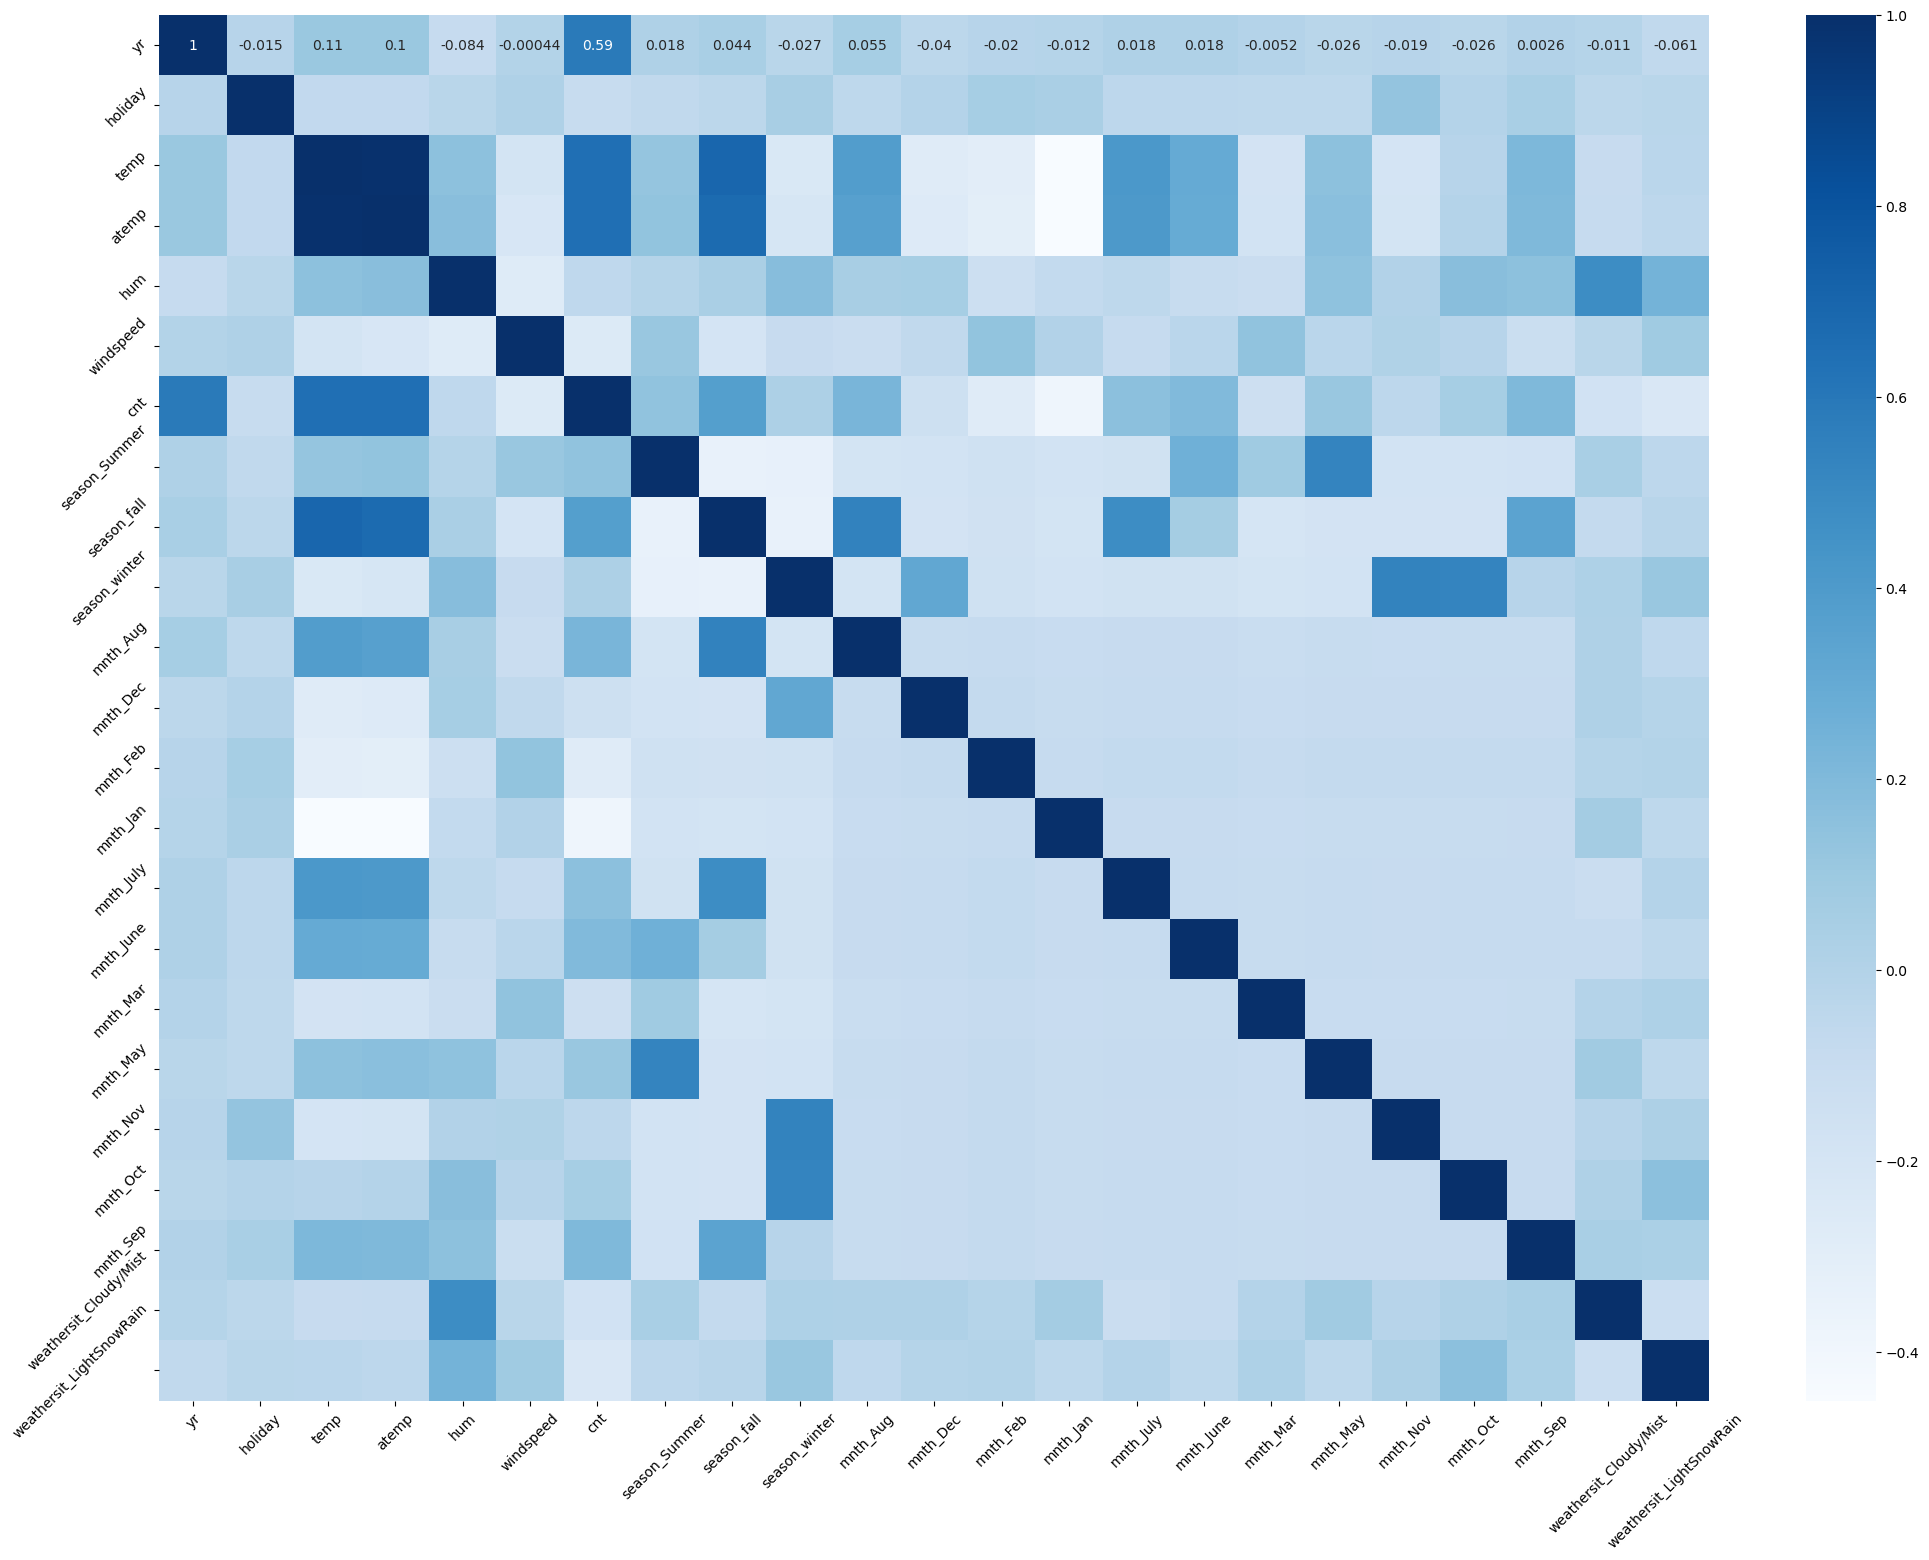

In [37]:
# Analyze correlation between variables
plt.figure(figsize = (25,18))
sns.heatmap(df_train.corr(), annot =True, cmap = "Blues")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

## Build the linear regression model using Recursive Feature Elimination (RFE)

In [38]:
# Separate target variable
Y_train = df_train.pop('cnt') 
X_train = df_train

In [39]:
# Define RFE model with desired number of features (12 in this case)
lm = LinearRegression()

In [40]:
# Define RFE model with desired number of features (12 in this case)
rfe = RFE(lm, n_features_to_select=12)
rfe = rfe.fit(X_train, Y_train)

In [41]:
# Print the selected features
print(list(X_train.columns[rfe.support_]))

['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_Summer', 'season_fall', 'season_winter', 'mnth_July', 'mnth_Sep', 'weathersit_Cloudy/Mist', 'weathersit_LightSnowRain']


In [42]:
# Build the model using the selected features
X_train_rfe = X_train[X_train.columns[rfe.support_]]
lm.fit(X_train_rfe, Y_train)

LinearRegression()

In [43]:
# Identify selected and rejected features based on RFE ranking
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Summer', True, 1),
 ('season_fall', True, 1),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 8),
 ('mnth_Dec', False, 4),
 ('mnth_Feb', False, 5),
 ('mnth_Jan', False, 2),
 ('mnth_July', True, 1),
 ('mnth_June', False, 11),
 ('mnth_Mar', False, 10),
 ('mnth_May', False, 7),
 ('mnth_Nov', False, 3),
 ('mnth_Oct', False, 9),
 ('mnth_Sep', True, 1),
 ('weathersit_Cloudy/Mist', True, 1),
 ('weathersit_LightSnowRain', True, 1)]

In [44]:
selected_features = X_train.columns[rfe.support_]
rejected_features = X_train.columns[~rfe.support_]
print("Selected Features (High Importance):")
print(selected_features)
print("\nRejected Features (Lower Importance):")
print(rejected_features)

Selected Features (High Importance):
Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_Summer',
       'season_fall', 'season_winter', 'mnth_July', 'mnth_Sep',
       'weathersit_Cloudy/Mist', 'weathersit_LightSnowRain'],
      dtype='object')

Rejected Features (Lower Importance):
Index(['atemp', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_June',
       'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct'],
      dtype='object')


In [45]:
# Calculating Variance Inflation Factor
def calculate_vif(X_train_rfe): 
    vif = pd.DataFrame() 
    vif['Features'] = X_train_rfe.columns
    vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
    vif['VIF'] = round (vif['VIF'], 2)
    vif = vif.sort_values (by = "VIF", ascending = False)
    print(vif)

In [46]:
calculate_vif(X_train_rfe)

                    Features    VIF
2                       temp  23.47
3                        hum  15.27
6                season_fall   7.16
4                  windspeed   3.64
5              season_Summer   3.42
7              season_winter   2.49
10    weathersit_Cloudy/Mist   2.13
0                         yr   2.03
8                  mnth_July   1.61
9                   mnth_Sep   1.41
11  weathersit_LightSnowRain   1.17
1                    holiday   1.04


## Build the linear regression model using selected features using STAR model

In [48]:
# Model 1
X_train_lm = sm.add_constant(X_train_rfe)
lm1 = sm.OLS(Y_train, X_train_lm).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     220.6
Date:                Tue, 01 Oct 2024   Prob (F-statistic):          2.95e-190
Time:                        20:49:07   Log-Likelihood:                 509.29
No. Observations:                 510   AIC:                            -992.6
Df Residuals:                     497   BIC:                            -937.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [49]:
# Identifying and removing the feature with high VIF (humidity).
X_train_new = X_train_rfe.drop(['hum'], axis=1)
calculate_vif(X_train_new)

                    Features    VIF
2                       temp  14.40
5                season_fall   6.81
4              season_Summer   3.37
3                  windspeed   3.27
6              season_winter   2.41
0                         yr   2.02
7                  mnth_July   1.59
9     weathersit_Cloudy/Mist   1.49
8                   mnth_Sep   1.40
10  weathersit_LightSnowRain   1.08
1                    holiday   1.04


In [50]:
# Model 2 : Fitting the final OLS model using the training data.
X_train_lm = sm.add_constant(X_train_new) 
lm2 = sm.OLS(Y_train, X_train_lm).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Tue, 01 Oct 2024   Prob (F-statistic):          5.06e-187
Time:                        20:49:23   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

## Model Evaluation and Selection
### Assessing the significance of p-values and VIF values. F- static value is greater than 1 and p(F) close to zero.
### Therefore Model 2 is the best fit

In [52]:
# Printing the coefficients of the final model parameters.
print(lm2.params)

const                       0.132265
yr                          0.233570
holiday                    -0.097463
temp                        0.490988
windspeed                  -0.147919
season_Summer               0.113656
season_fall                 0.067169
season_winter               0.148910
mnth_July                  -0.052057
mnth_Sep                    0.076846
weathersit_Cloudy/Mist     -0.080167
weathersit_LightSnowRain   -0.284199
dtype: float64


## Residual analysis

In [53]:
# Predicting Target Variable (Y_train) Using Model lm2
Y_train_pred = lm2.predict(X_train_lm)
Y_train_pred.head()

576    0.742032
426    0.465108
728    0.388090
482    0.565713
111    0.279196
dtype: float64

## Error Distribution Analysis

Text(0.5, 0, 'Errors')

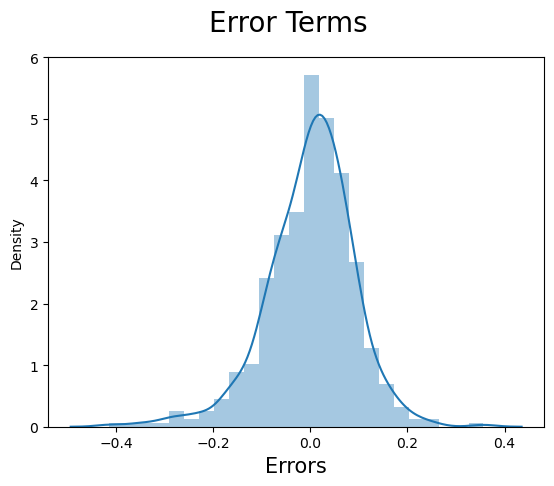

In [58]:
# Visualizing Error Terms with a Histogram
fig = plt.figure() 
sns.distplot((Y_train - Y_train_pred), bins=25) 
fig.suptitle('Error Terms', fontsize=20)
plt.xlabel('Errors', fontsize = 15)

## Assessing Model Assumptions: Normality and Linearity

<Figure size 800x800 with 0 Axes>

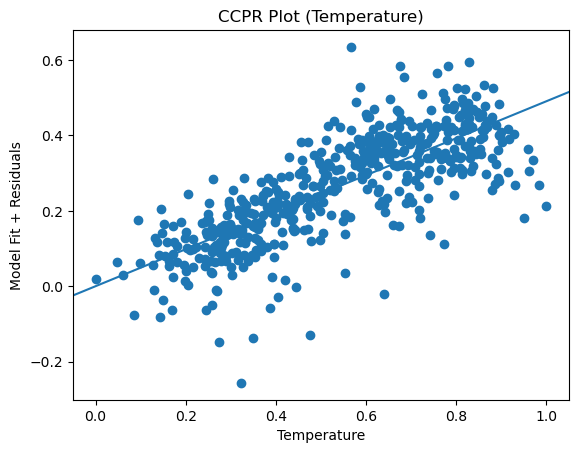

<Figure size 800x800 with 0 Axes>

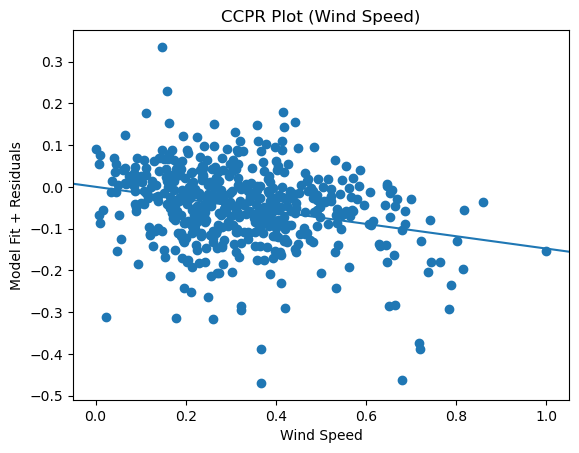

In [61]:
# Validating Model Linearity: Component-Component Plus Residual (CCPR) Plots
plt.figure(figsize=(8, 8))
sm.graphics.plot_ccpr(lm2, 'temp')  
plt.title('CCPR Plot (Temperature)')
plt.xlabel('Temperature')
plt.ylabel('Model Fit + Residuals')
plt.show()

plt.figure(figsize=(8, 8))
sm.graphics.plot_ccpr(lm2, 'windspeed')
plt.title('CCPR Plot (Wind Speed)')
plt.xlabel('Wind Speed')
plt.ylabel('Model Fit + Residuals')
plt.show()

## Prediction with the final model

In [62]:
# Scaling Test Data for Accurate Predictions
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [63]:
df_test.head()

,yr,holiday,temp,atemp,hum,windspeed,cnt,season_Summer,season_fall,season_winter,...,mnth_Jan,mnth_July,mnth_June,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weathersit_Cloudy/Mist,weathersit_LightSnowRain
184,0,1,0.831783,0.769660,0.657364,0.084219,0.692706,0,1,0,...,0,1,0,0,0,0,0,0,1,0
535,1,0,0.901354,0.842587,0.610133,0.153728,0.712034,1,0,0,...,0,0,1,0,0,0,0,0,0,0
299,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,1,...,0,0,0,0,0,0,1,0,1,0
221,0,0,0.881625,0.795343,0.437098,0.339570,0.547400,0,1,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [64]:
df_test.describe()

,yr,holiday,temp,atemp,hum,windspeed,cnt,season_Summer,season_fall,season_winter,...,mnth_Jan,mnth_July,mnth_June,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weathersit_Cloudy/Mist,weathersit_LightSnowRain
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.558718,0.532847,0.638221,0.313293,0.522154,0.263636,0.245455,0.236364,...,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,0.086364,0.318182,0.027273
std,0.500809,0.187620,0.233187,0.217401,0.148694,0.159584,0.219163,0.441609,0.431338,0.425817,...,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,0.281541,0.466833,0.163248
min,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [65]:
# Preparing Test Data for Prediction using lm2
Y_test = df_test.pop('cnt')
X_test = df_test

In [66]:
X_test_new = X_test[X_train_new.columns]
X_test_lm = sm.add_constant(X_test_new)
Y_test_pred = lm2.predict(X_test_lm)

In [67]:
# Calculate r2 square for predicted values
r2_score(Y_test, Y_test_pred)

0.8052680349048547

### Evaluating Model Fit: R-squared and Adjusted R-squared

In [69]:
#calculate the adjusted r2
def adjusted_r2(r2, n, p):
    return 1 - (1-r2)*((n-1)/(n-p-1))

In [70]:
# Calculate the adjusted R-squared for the test data
n = len(Y_test) 
p = X_test_new.shape[1]
adjusted_r2_test = adjusted_r2(r2_score(Y_test, Y_test_pred), n, p)
print("Adjusted R-squared for Test:", adjusted_r2_test)

Adjusted R-squared for Test: 0.7949697098277075


## Adjusted R-squared value is close to R-squared value
## Model Evaluation

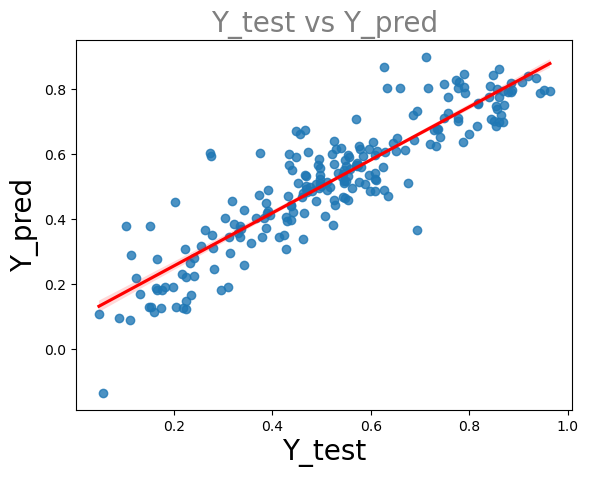

In [71]:
# Visualizing Model Performance: Scatter Plot with Regression Fit Line
plt.figure()
sns.regplot(x = Y_test, y = Y_test_pred, ci = 68, fit_reg = True, line_kws={"color": "red"}) 
plt.title('Y_test vs Y_pred', fontsize=20, alpha=0.5) 
plt.xlabel('Y_test', fontsize=20) 
plt.ylabel('Y_pred', fontsize=20)
plt.show()

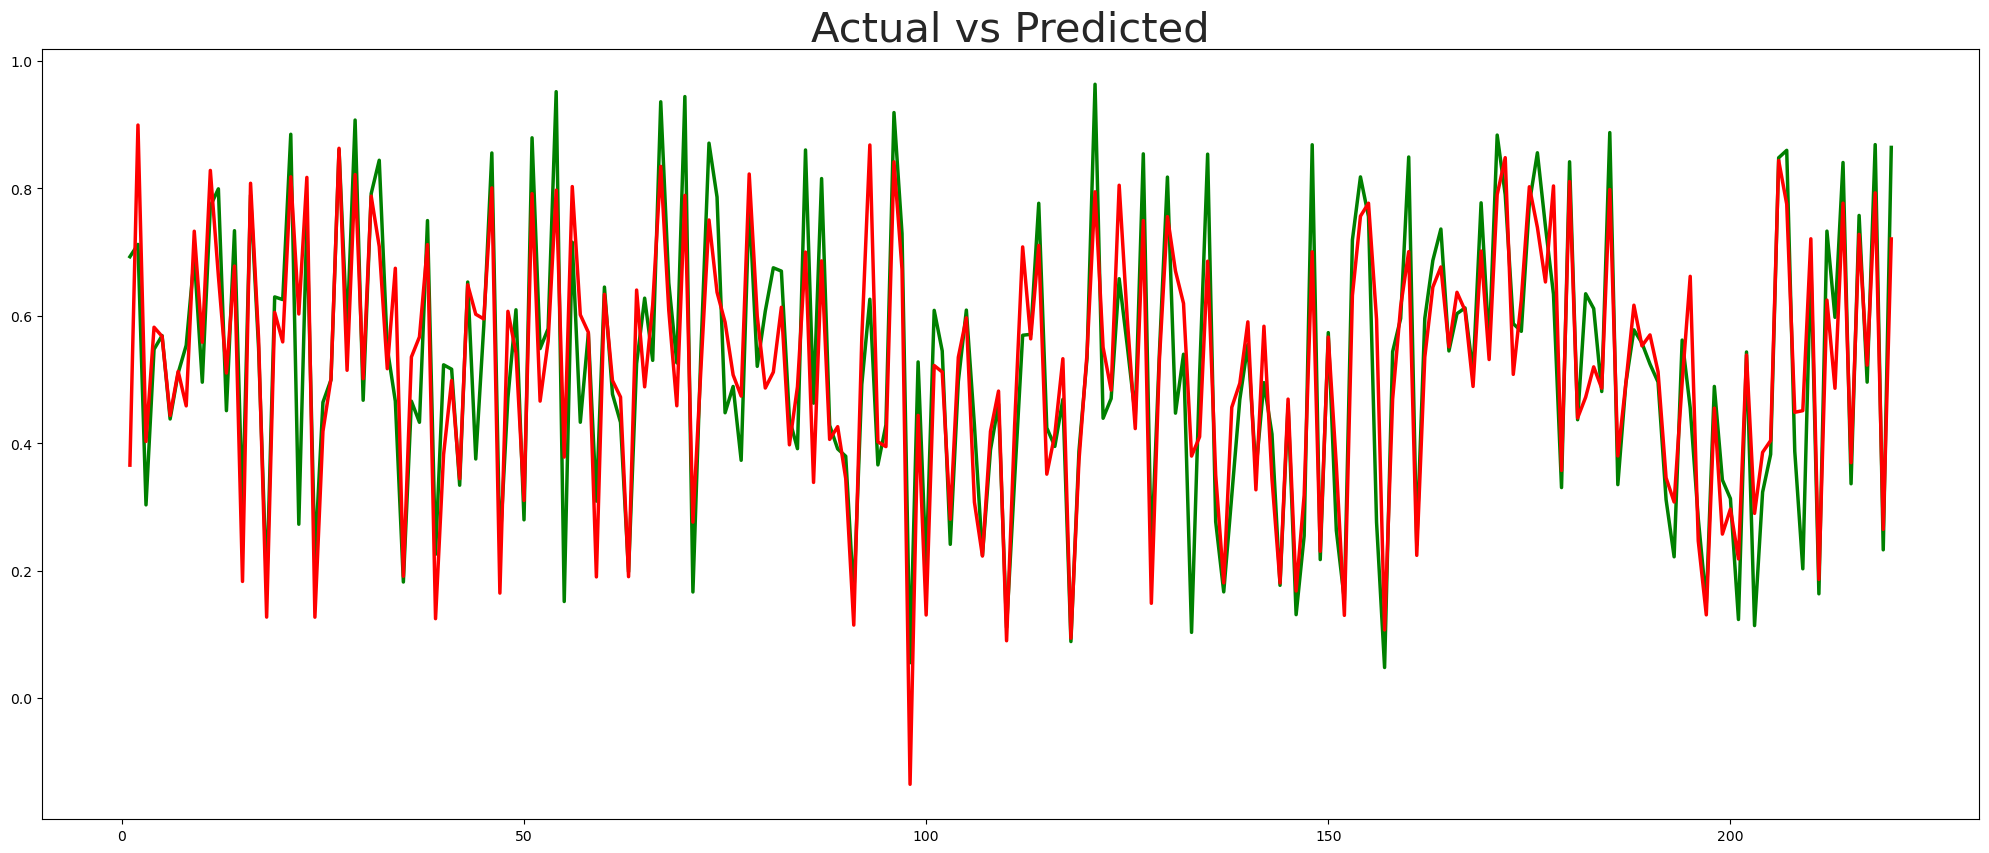

In [75]:
# Actual vs Predicted Values
c = [i for i in range (1,len(Y_test) + 1,1)]
fig = plt.figure(figsize=(25,10))
plt.title('Actual vs Predicted', fontsize=30, alpha=0.85)
plt.plot(c, Y_test, color='Green', label='Actual', linewidth=2.5, linestyle='-') 
plt.plot(c, Y_test_pred, color='Red', label= 'Predicted', linewidth=2.5, linestyle='-')
plt.show()

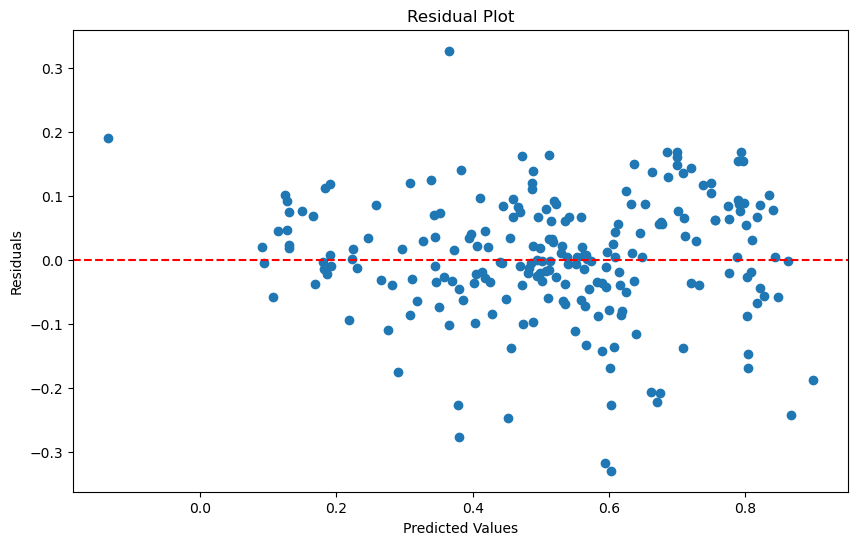

In [76]:
#Residual Plots
plt.figure(figsize=(10, 6))
plt.scatter(Y_test_pred, (Y_test - Y_test_pred))
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

In [5]:
## Identify the package versions used in this notebook/runtime 
import pkg_resources
def get_installed_packages():
    installed_packages = pkg_resources.working_set
    package_list = {}
    for package in installed_packages:
        package_list[package.key]=package.version
    return package_list
packages = get_installed_packages()
        
for package_name, version in packages.items():
    if package_name in ['numpy', 'pandas', 'matplotlib', 'seaborn', 'sklearn', 'statsmodels']: 
        print(f"{package_name}: {version}")

matplotlib: 3.8.0
numpy: 1.26.4
pandas: 2.1.4
seaborn: 0.12.2
statsmodels: 0.14.0


## Summary

### Bike Sharing is mainly dependent on below:
- **Temperature:** Higher temperatures correlate with increased rentals.
- **Windspeed:** Low windspeeds are favorable for bike rentals.
- **Season:** Spring has the lowest demand, while summer and autumn have higher demand.
- **Year:** Rental demand has increased over time.
- **Weekday vs. Weekend:** Weekdays have slightly higher average rentals than weekends.

### Results:- 
Training Data: R² = 0.835, Adjusted R² = 0.832- 
Test Data: R² = 0.805, Adjusted R² = 0.75



## Libraries Used:
- matplotlib: 3.8.0
- numpy: 1.26.4
- pandas: 2.1.4
- seaborn: 0.12.2
- statsmodels: 0.14.0